In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()  
%matplotlib inline
from uszipcode import SearchEngine
from pandas import Grouper
from pandas import DataFrame
from random import randrange
from pandas import Series
from matplotlib import pyplot
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import read_csv
from pandas import datetime
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import folium
from statsmodels.tsa.stattools import adfuller
import math

In [2]:
pip install uszipcode

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install folium

# Quality Check

## 1. airbnb

In [4]:
#read the airbnb data
df=pd.read_csv('listings.csv') 

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190708031610,2019-07-09,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
4,5022,https://www.airbnb.com/rooms/5022,20190708031610,2019-07-08,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10


In [6]:
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.889500e+04,4.889500e+04,0.0,0.0,0.0,4.889500e+04,0.0,48874.000000,48874.000000,48895.000000,...,37852.000000,37817.000000,37840.000000,37813.000000,37815.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000
mean,1.901714e+07,2.019071e+13,NaN,NaN,NaN,6.762001e+07,NaN,14.281745,14.281745,40.728949,...,9.279298,9.746119,9.757135,9.564674,9.399392,7.143982,5.559546,1.473811,0.110625,1.373221
std,1.098311e+07,5.449274e+00,NaN,NaN,NaN,7.861097e+07,NaN,84.151375,84.151375,0.054530,...,1.084514,0.719957,0.724397,0.758343,0.907107,32.952519,32.149232,5.600618,0.986685,1.680442
min,2.539000e+03,2.019071e+13,NaN,NaN,NaN,2.438000e+03,NaN,0.000000,0.000000,40.499790,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.471945e+06,2.019071e+13,NaN,NaN,NaN,7.822033e+06,NaN,1.000000,1.000000,40.690100,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.190000
50%,1.967728e+07,2.019071e+13,NaN,NaN,NaN,3.079382e+07,NaN,1.000000,1.000000,40.723070,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.720000
75%,2.915218e+07,2.019071e+13,NaN,NaN,NaN,1.074344e+08,NaN,2.000000,2.000000,40.763115,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,2.020000
max,3.648724e+07,2.019071e+13,NaN,NaN,NaN,2.743213e+08,NaN,1070.000000,1070.000000,40.913060,...,10.000000,10.000000,10.000000,10.000000,10.000000,327.000000,319.000000,101.000000,23.000000,58.500000


## a. zipcodes

In [7]:

# we write a function to extract the zipcode based on latitude and longitude 
def convert_zipcode(lat,long):
    search = SearchEngine(simple_zipcode=True)
    result = search.by_coordinates(lat,long, radius=10, returns=1)    
    res=result[0]
    return res.zipcode


In [8]:

#convert zipcode to type string and limit it to 5 
df['zipcode'] = df['zipcode'].astype('str').apply(lambda x:x[:5])
cleanzipcode =df[~df['zipcode'].isin(['nan'])] 
missingzip = df[df['zipcode'].isin(['nan'])]

print('The length of the zipcodes is ', len(df.zipcode))
print('The length of the zipcodes with null values is ', len(missingzip.zipcode))



The length of the zipcodes is  48895
The length of the zipcodes with null values is  517


In [9]:
#finding zipcodes based on the longitude and latitude given in the dataset 
missingzip.zipcode = missingzip.apply(lambda row: convert_zipcode(row['latitude'], row['longitude']), axis=1)

#print the length of missing values
print(len(missingzip[missingzip.zipcode=='nan']))

# append the previous and newly acquired zipcodes
df_zip = cleanzipcode.append(missingzip, ignore_index=True)
print('The length on newly acquired zipcodes',len(df_zip.zipcode))

0
The length on newly acquired zipcodes 48895


//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## b. bedrooms

In [10]:
df_zip_bed=df_zip.loc[df_zip['bedrooms']==2]

## c. state

In [11]:
df_zip_bed.state.unique()

array(['NY', 'Ny', nan], dtype=object)

In [12]:
df_zip_bed.state = df_zip_bed.state.replace("Ny","NY")

In [13]:
df_zip_bed.loc[df_zip_bed['state']!='NY']
#after checking the raw data, id=36319687 is located in NY.

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
48067,36319687,https://www.airbnb.com/rooms/36319687,20190708031610,2019-07-08,Amazing and very large bedroom,NaN,NaN,NaN,none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN


In [14]:
df_zip_bed['state'].fillna('NY' ,inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
df_zip_bed.state.unique()

array(['NY'], dtype=object)

In [16]:
df_zip_bed.state.count()

6497

## d. price

In [17]:
df_zip_bed.price.count()

6497

# e. weekly_price

In [18]:
df_zip_bed.weekly_price.count()

790

In [19]:
df_zip_bed['price'] = df_zip_bed['price'].replace( '[\$,)]','', regex=True ).astype(float)
df_zip_bed['weekly_price'] = df_zip_bed['weekly_price'].replace( '[\$,)]','', regex=True ).astype(float)
df_zip_bed['weekly_price'] = df_zip_bed['weekly_price'].fillna(df_zip_bed['price']*7)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [20]:
df_zip_bed.weekly_price.count()

6497

# f. monthly_price

In [21]:
df_zip_bed.monthly_price.count()

696

In [22]:
df_zip_bed['price'] = df_zip_bed['price'].replace( '[\$,)]','', regex=True ).astype(float)
df_zip_bed['monthly_price'] = df_zip_bed['monthly_price'].replace( '[\$,)]','', regex=True ).astype(float)
df_zip_bed['monthly_price'] = df_zip_bed['monthly_price'].fillna(df_zip_bed['price']*30)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [23]:
df_zip_bed.monthly_price.count()

6497

# g. extra_people

In [24]:
df_zip_bed['extra_people'] = df_zip_bed['extra_people'].replace( '[\$,)]','', regex=True ).astype(float)
df_zip_bed.extra_people.count()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


6497

# h. guests_included

In [25]:
df_zip_bed.guests_included.count()

6497

# i. accommodates

In [26]:
df_zip_bed.accommodates.count()

6497

# j. availability_365

In [27]:
df_zip_bed.availability_365.count()
#Now, we have cleaned all the variables we need in airbnb dataset. Let's move to the next dataset.

6497

# zillow

In [28]:
#read the zillow data
df2=pd.read_csv('Zip_Zhvi_2bedroom.csv') 
df2=df2.rename(columns={"RegionName": "zipcode"})
df2['zipcode']=df2['zipcode'].astype(int)

In [29]:
df2.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [30]:
df2.describe()

,RegionID,zipcode,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
count,8946.000000,8946.000000,8946.000000,6284.000000,6364.000000,6364.000000,6369.000000,6370.000000,6370.000000,6370.000000,...,8.946000e+03,8.946000e+03,8.946000e+03,8.943000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03
mean,80671.285938,47494.449027,4473.500000,93754.057925,93616.043369,93642.630421,93609.734652,93646.357928,93722.339089,93849.262166,...,2.057233e+05,2.071612e+05,2.086479e+05,2.099822e+05,2.110339e+05,2.121189e+05,2.132461e+05,2.143624e+05,2.155610e+05,2.165161e+05
std,31636.286116,30868.419487,2582.632088,44385.146499,44222.734487,44225.112290,44264.266105,44340.199368,44457.610118,44605.248316,...,1.952097e+05,1.960432e+05,1.970957e+05,1.981392e+05,1.988496e+05,1.995264e+05,2.004473e+05,2.017663e+05,2.031817e+05,2.041795e+05
min,58196.000000,1001.000000,1.000000,22400.000000,23500.000000,24500.000000,25400.000000,26200.000000,26700.000000,27200.000000,...,2.890000e+04,2.880000e+04,2.820000e+04,2.810000e+04,2.830000e+04,2.810000e+04,2.830000e+04,2.870000e+04,2.830000e+04,2.800000e+04
25%,66819.250000,21125.500000,2237.250000,64100.000000,64000.000000,64000.000000,64000.000000,63900.000000,63900.000000,64000.000000,...,9.870000e+04,9.942500e+04,9.992500e+04,1.007500e+05,1.014000e+05,1.023000e+05,1.029000e+05,1.036250e+05,1.046000e+05,1.053000e+05
50%,77191.500000,44404.000000,4473.500000,84500.000000,84500.000000,84600.000000,84600.000000,84700.000000,84700.000000,84850.000000,...,1.492000e+05,1.503000e+05,1.514500e+05,1.525000e+05,1.533000e+05,1.542000e+05,1.549000e+05,1.556000e+05,1.565000e+05,1.571000e+05
75%,92251.250000,77357.750000,6709.750000,111000.000000,110800.000000,111000.000000,110900.000000,110900.000000,110975.000000,111100.000000,...,2.352500e+05,2.373000e+05,2.390000e+05,2.407000e+05,2.422750e+05,2.435000e+05,2.450000e+05,2.460750e+05,2.474000e+05,2.486750e+05
max,738092.000000,99901.000000,8946.000000,420700.000000,422300.000000,430400.000000,440400.000000,447100.000000,453000.000000,454300.000000,...,3.347100e+06,3.305500e+06,3.261100e+06,3.244000e+06,3.231400e+06,3.183300e+06,3.160200e+06,3.193500e+06,3.262200e+06,3.316500e+06


# a. city

In [31]:
df2=df2.loc[df2['City']=='New York']

In [32]:
df2.CountyName.unique()

array(['New York', 'Kings', 'Richmond', 'Queens'], dtype=object)

In [33]:
df2.zipcode.unique()

array([10025, 10023, 10128, 10011, 10003, 11201, 11234, 10314, 11215,
       10028, 10021, 10014, 10036, 11434, 10306, 10312, 10022, 11217,
       10013, 11231, 10304, 10305, 10309, 10308, 10303])

# b. time

In [34]:
df2['zipcode'].count()


25

In [35]:
df2['2005-10'].count()

24

In [36]:
df2['2007-06'].count()
# so, we use data from 2007-06 to 2017-06.

25

# Merge

In [37]:
#join two dataset
df_zip_bed['zipcode']=df_zip_bed['zipcode'].astype(int)
df_join=pd.merge(df_zip_bed, df2, on='zipcode')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
df_join.zipcode.unique()
# after comparison, the airbnb data is lacking in 10312

array([11215, 11217, 11231, 10023, 11201, 10013, 10011, 10003, 10025,
       10128, 10014, 10022, 10036, 10314, 10021, 10028, 10305, 10304,
       11234, 10308, 11434, 10303, 10306, 10309])

In [39]:
cols=['id','zipcode', 'listing_url', 'latitude', 'longitude', 'price', 'weekly_price', 'monthly_price', 'extra_people', 'guests_included', 'accommodates', 'availability_365', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03',
 '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',  '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
df_join[cols].head()

,id,zipcode,listing_url,latitude,longitude,price,weekly_price,monthly_price,extra_people,guests_included,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,16458,11215,https://www.airbnb.com/rooms/16458,40.67343,-73.98338,225.0,1575.0,6750.0,0.0,1,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
1,27659,11215,https://www.airbnb.com/rooms/27659,40.66499,-73.97925,400.0,2700.0,12000.0,0.0,1,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
2,41348,11215,https://www.airbnb.com/rooms/41348,40.66858,-73.99083,250.0,1750.0,7500.0,40.0,2,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
3,58062,11215,https://www.airbnb.com/rooms/58062,40.65850,-73.98397,135.0,810.0,4050.0,25.0,2,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
4,76761,11215,https://www.airbnb.com/rooms/76761,40.66552,-73.99019,169.0,1183.0,5070.0,25.0,1,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800


In [40]:
df_join[cols].count()
# the dataset is now complete

id                  1573
zipcode             1573
listing_url         1573
latitude            1573
longitude           1573
price               1573
weekly_price        1573
monthly_price       1573
extra_people        1573
guests_included     1573
accommodates        1573
availability_365    1573
2007-06             1573
2007-07             1573
2007-08             1573
2007-09             1573
2007-10             1573
2007-11             1573
2007-12             1573
2008-01             1573
2008-02             1573
2008-03             1573
2008-04             1573
2008-05             1573
2008-06             1573
2008-07             1573
2008-08             1573
2008-09             1573
2008-10             1573
2008-11             1573
                    ... 
2015-01             1573
2015-02             1573
2015-03             1573
2015-04             1573
2015-05             1573
2015-06             1573
2015-07             1573
2015-08             1573
2015-09             1573


# Data Munging

# 1. Predict the house price

In [41]:
house=df_join[cols][['zipcode', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03',
 '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',  '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']]

house.head()

,zipcode,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,11215,503100.0,490300.0,483200.0,483200.0,483400.0,501100.0,511200.0,503700.0,495400.0,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
1,11215,503100.0,490300.0,483200.0,483200.0,483400.0,501100.0,511200.0,503700.0,495400.0,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
2,11215,503100.0,490300.0,483200.0,483200.0,483400.0,501100.0,511200.0,503700.0,495400.0,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
3,11215,503100.0,490300.0,483200.0,483200.0,483400.0,501100.0,511200.0,503700.0,495400.0,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800
4,11215,503100.0,490300.0,483200.0,483200.0,483400.0,501100.0,511200.0,503700.0,495400.0,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800


In [42]:
house=house.melt(id_vars=['zipcode'], var_name='date')
house=house.drop_duplicates(subset=['zipcode','date', 'value'])
house.head()

,zipcode,date,value
0,11215,2007-06,503100.0
190,11217,2007-06,553600.0
314,11231,2007-06,560500.0
407,10023,2007-06,1411200.0
487,11201,2007-06,600400.0


In [43]:
house.date.unique()

array(['2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11',
       '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05',
       '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11',
       '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05',
       '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11',
       '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
       '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05',
       '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11',
       '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05',
       '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11',
       '2013-12', '2014-01', '2014-02', '2014-03', 

In [44]:
house['date'] = pd.to_datetime(house['date'])

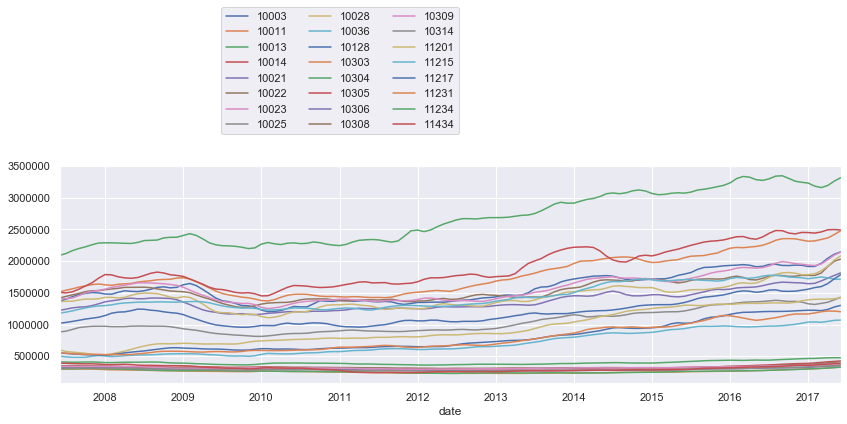

In [45]:
#plot the time series data
plt.figure(figsize=(14, 4),)
house.set_index('date', inplace=True)
house.groupby('zipcode')['value'].plot(legend=True)

plt.legend(loc='best', bbox_to_anchor=(0.2, 1.12),ncol=3)

# Simplify the model

In [46]:
#It will be a lot of work if we develop house price predicting models for each zipcode. 
#To simplify,I will only develop one model for the average house price for all zipcodes in NYC.
house.head()

,zipcode,value
date,,
2007-06-01,11215,503100.0
2007-06-01,11217,553600.0
2007-06-01,11231,560500.0
2007-06-01,10023,1411200.0
2007-06-01,11201,600400.0


In [47]:
#calculate the average house price
house_avg=house.groupby(['date']).mean()
house_avg=house_avg.drop(['zipcode'], axis=1)
#apply log to house price
house_avg['value'] = np.log(house_avg['value'])

In [48]:
house_avg.head()

,value
date,
2007-06-01,13.647077
2007-07-01,13.651903
2007-08-01,13.662253
2007-09-01,13.675669
2007-10-01,13.686924


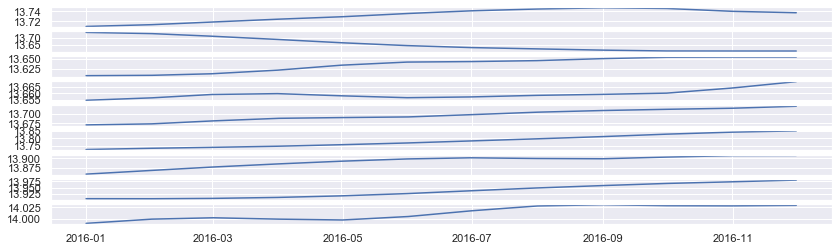

In [49]:
#take 9 full years of data as seperate groups
# multiple line plots of time series
groups = house_avg['2008':'2016'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure(figsize=(14, 4),)
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()
#there seems to be an upward trend in each year.
#there is no seasonality.
#the variance seems constant.

# Differencing

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


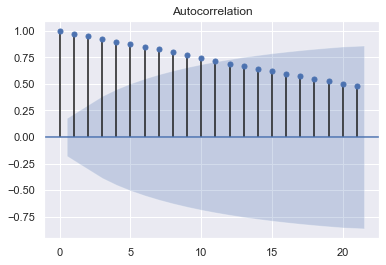

In [50]:
#the acf plot decays slowly, which shows the data is not stationary. Next, we will do differencing.
plot_acf(house_avg['value']).show()

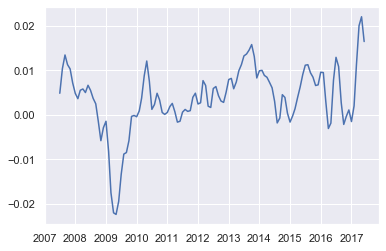

In [51]:
#plot the differencing data
Dhouse = house_avg.diff().dropna()
Dhouse.columns = ['diff']
pyplot.plot(Dhouse)
pyplot.show()

## Check if it is stationary

In [52]:
#use augmented Dickey–Fuller test (ADF) to test stationarity
X = Dhouse['diff']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
# so, now it is stationary. 5% level reject the null hyphotheses

ADF Statistic: -2.975161
p-value: 0.037280
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


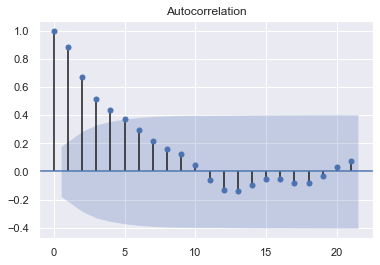

In [53]:
plot_acf(Dhouse['diff']).show()

//anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


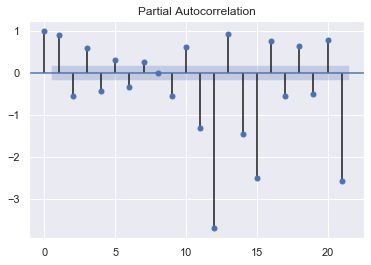

In [54]:
plot_pacf(Dhouse['diff']).show()

In [55]:
#automatic method to choose best parameter
house_avg['value'] = house_avg['value'].astype(float)
pmax = 4
qmax = 4
#the maximum values of p and q are usually no more than 4
bic_matrix = [] 
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: 
            tmp.append(ARIMA(house_avg, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) 

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7

In [56]:
p,q = bic_matrix.stack().idxmin()
print('The lowest p and q through BIC is：%s、%s' %(p,q))

The lowest p and q through BIC is：1、3


In [57]:
model=ARIMA(house_avg,(1,1,3)).fit()
model.summary() 

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  120
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 568.002
Method:                       css-mle   S.D. of innovations              0.002
Date:                Tue, 24 Mar 2020   AIC                          -1124.004
Time:                        13:18:43   BIC                          -1107.279
Sample:                    07-01-2007   HQIC                         -1117.212
                         - 06-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0041      0.002      1.955      0.051   -9.58e-06       0.008
ar.L1.D.value     0.8344      0.084      9.988      0.000       0.671       0.998
ma.L1.D.value     1.1418      0.132      8.644      0.000       0.883       1.401
ma.L2.D.value     0.1726      0.216      0.797      0.425      -0.252       0.597
ma.L3.D.value    -0.4242      0.138     -3.081      0.002      -0.694      -0.154
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1985           +0.0000j            1.1985            0.0000
MA.1           -0.8762           -0.5693j            1.0449           -0.4083
MA.2           -0.8762           +0.5693j            1.0449            0.4083
MA.3            2.1592           -0.0000j            2.1592           -0.0000
-----------------------------------------------------------------------------
"""

<Figure size 864x576 with 0 Axes>

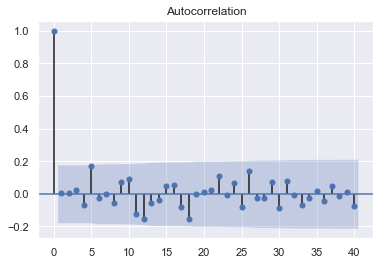

In [58]:
resid = model.resid 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()
#residuals are white noise

# Calculate ROI and Payback Period

In [59]:
house.head()

,zipcode,value
date,,
2007-06-01,11215,503100.0
2007-06-01,11217,553600.0
2007-06-01,11231,560500.0
2007-06-01,10023,1411200.0
2007-06-01,11201,600400.0


In [60]:
tmp = []
for i in house.zipcode.unique():
    house_i=house.loc[house['zipcode']== i]
    house_i['value'] = np.log(house_i['value'])
    house_i=house_i.drop(['zipcode'], axis=1)
    try:
        tmp.append(ARIMA(house_i,(1,1,3)).fit().forecast(31)[0][30])
    except:
        tmp.append(ARIMA(house_i,(1,2,3)).fit().forecast(31)[0][30])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa

In [61]:
tmp

[14.068527768692828,
 14.29568473140643,
 14.167909014601854,
 14.743696787507396,
 14.304586551773014,
 15.145107072743372,
 14.893668476502192,
 14.65715607988479,
 14.32338537753076,
 14.604312985991474,
 14.852634440535319,
 14.595439899402258,
 14.18645920523401,
 13.026240780471369,
 14.569508640608204,
 nan,
 13.30322589866735,
 13.0609991294414,
 13.111817229546658,
 13.26319664116184,
 12.856633157347675,
 13.013428954914758,
 nan,
 nan]

In [62]:
#modify the nan values
house_10028=house.loc[house['zipcode']==10028]
house_10028['value'] = np.log(house_10028['value'])
house_10028=house_10028.drop(['zipcode'], axis=1)
model_10028=ARIMA(house_10028,(1,2,3)).fit()
model_10028.forecast(31)
model_10028.forecast(31)[0][30]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


14.995037166176756

In [63]:
house_10306=house.loc[house['zipcode']==10306]
house_10306['value'] = np.log(house_10306['value'])
house_10306=house_10306.drop(['zipcode'], axis=1)
model_10306=ARIMA(house_10306,(1,2,3)).fit()
model_10306.forecast(31)
model_10306.forecast(31)[0][30]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


13.071989592957465

In [64]:
house_10309=house.loc[house['zipcode']==10309]
house_10309['value'] = np.log(house_10309['value'])
house_10309=house_10309.drop(['zipcode'], axis=1)
model_10309=ARIMA(house_10309,(1,2,3)).fit()
model_10309.forecast(31)
model_10309.forecast(31)[0][30]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


13.174123730438794

In [65]:
tmp[15]=14.995037166176756
tmp[22]=13.071989592957465
tmp[23]=13.174123730438794

In [66]:
# Revenue
cal=df_join[cols]
cal['reprice']= 0.7*cal['price'] + 0.2*cal['weekly_price']/7+0.1*cal['monthly_price']/30                    
cal['value']=(cal['reprice']+cal['extra_people']*(cal['accommodates']-cal['guests_included']))*cal['availability_365']*0.75*0.97

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [67]:
cal['zipcode'].size

1573

In [68]:
#Cost, which is also the house price in 2020
dataset = pd.DataFrame(list(zip(house.zipcode.unique(), tmp)), 
               columns =['zipcode', 'price']) 
dataset['price'] = dataset.price.apply(np.exp)

In [69]:
dataset.head()

,zipcode,price
0,11215,1.287905e+06
1,11217,1.616356e+06
2,11231,1.422475e+06
3,10023,2.529916e+06
4,11201,1.630809e+06


In [70]:
cal.head()

,id,zipcode,listing_url,latitude,longitude,price,weekly_price,monthly_price,extra_people,guests_included,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,reprice,value
0,16458,11215,https://www.airbnb.com/rooms/16458,40.67343,-73.98338,225.0,1575.0,6750.0,0.0,1,...,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800,225.000000,0.000000
1,27659,11215,https://www.airbnb.com/rooms/27659,40.66499,-73.97925,400.0,2700.0,12000.0,0.0,1,...,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800,397.142857,62407.028571
2,41348,11215,https://www.airbnb.com/rooms/41348,40.66858,-73.99083,250.0,1750.0,7500.0,40.0,2,...,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800,250.000000,0.000000
3,58062,11215,https://www.airbnb.com/rooms/58062,40.65850,-73.98397,135.0,810.0,4050.0,25.0,2,...,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800,131.142857,35844.548571
4,76761,11215,https://www.airbnb.com/rooms/76761,40.66552,-73.99019,169.0,1183.0,5070.0,25.0,1,...,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800,169.000000,38927.070000


In [71]:
#add the cost volumn into dataframe "cal"
cal['cost']= cal['zipcode']
for j in range(0,1573):
    for i in range(0,24):
        if cal['zipcode'][j] == dataset['zipcode'][i]:
            cal['cost'][j]= dataset['price'][i]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [72]:
#calculate ROI and Payback period
cal['ROI'] = (cal['value']-cal['cost'])/cal['cost']
cal['PP'] = cal['cost'] / cal['value']
cal['logcost'] = np.log(cal['cost'])
indexname = cal[cal['value'] == 0 ].index
cal.drop(indexname , inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [73]:
cal.head()

,id,zipcode,listing_url,latitude,longitude,price,weekly_price,monthly_price,extra_people,guests_included,...,2017-03,2017-04,2017-05,2017-06,reprice,value,cost,ROI,PP,logcost
1,27659,11215,https://www.airbnb.com/rooms/27659,40.66499,-73.97925,400.0,2700.0,12000.0,0.0,1,...,1035800,1050000,1066200,1070800,397.142857,62407.028571,1287905,-0.951544,20.637179,14.068527
3,58062,11215,https://www.airbnb.com/rooms/58062,40.65850,-73.98397,135.0,810.0,4050.0,25.0,2,...,1035800,1050000,1066200,1070800,131.142857,35844.548571,1287905,-0.972168,35.930289,14.068527
4,76761,11215,https://www.airbnb.com/rooms/76761,40.66552,-73.99019,169.0,1183.0,5070.0,25.0,1,...,1035800,1050000,1066200,1070800,169.000000,38927.070000,1287905,-0.969775,33.085074,14.068527
5,121861,11215,https://www.airbnb.com/rooms/121861,40.67644,-73.98082,165.0,1050.0,4950.0,0.0,2,...,1035800,1050000,1066200,1070800,162.000000,824.985000,1287905,-0.999359,1561.125354,14.068527
6,127387,11215,https://www.airbnb.com/rooms/127387,40.66862,-73.99260,260.0,1700.0,4600.0,50.0,4,...,1035800,1050000,1066200,1070800,245.904762,56531.045714,1287905,-0.956106,22.782260,14.068527


In [74]:
cols=['zipcode', 'PP', 'logcost','ROI','cost']
cal2=cal[cols]
cal2=cal2.groupby(['zipcode'], as_index=False).mean()

In [75]:
cal2.head()

,zipcode,PP,logcost,ROI,cost
0,10003,583.183274,14.657156,-0.981115,2320181
1,10011,638.333995,14.893668,-0.981716,2939260
2,10013,1378.711305,15.145107,-0.982008,3779518
3,10014,327.381702,14.852634,-0.980121,2821091
4,10021,362.722934,14.569508,-0.985072,2125480


In [76]:
cal2.loc[cal2['zipcode']==10306]

,zipcode,PP,logcost,ROI,cost
14,10306,11.380011,13.071988,-0.911701,475436


Text(0, 0.5, 'Payback Period')

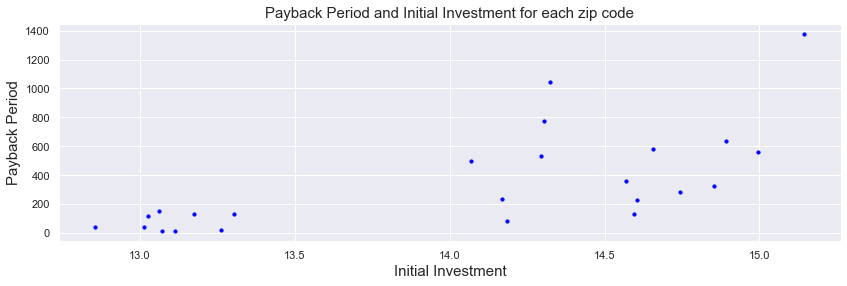

In [77]:
# Plotting the data points
fig, ax = plt.subplots(figsize=(14, 4))
ax.scatter(cal2['logcost'], cal2['PP'], c='blue', s=10)
ax.set_title('Payback Period and Initial Investment for each zip code', fontsize=15)
ax.set_xlabel('Initial Investment', fontsize=15)
ax.set_ylabel('Payback Period', fontsize=15)

In [78]:
#find the top five zip codes which have the smallest payback period
cal2.nsmallest(5, 'PP')

,zipcode,PP,logcost,ROI,cost
14,10306,11.380011,13.071988,-0.911701,475436
22,11234,15.955811,13.111816,-0.894826,494754
15,10308,22.594862,13.263196,-0.954969,575616
11,10303,38.985886,13.013428,-0.964536,448394
23,11434,43.781869,12.856631,-0.952110,383322


In [79]:
#find the top five zip codes which have the smallest initial investment
cal2.nsmallest(5, 'logcost')

,zipcode,PP,logcost,ROI,cost
23,11434,43.781869,12.856631,-0.952110,383322
11,10303,38.985886,13.013428,-0.964536,448394
17,10314,116.339104,13.026240,-0.991312,454176
12,10304,149.958051,13.060998,-0.985009,470240
14,10306,11.380011,13.071988,-0.911701,475436


In [80]:
#10306/10303(staten island)/11434(queens) are three most profitable zipcodes.

# Data Visualization

In [81]:
#visulization 1
vdata=cal.loc[cal['zipcode'].isin([10306,10303,11434])]
vdata.index = range(len(vdata))
vdata['zipcode']=vdata['zipcode'].astype(str)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [82]:
# Here we pass coordinates
# and starting Zoom level = 15
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=15)

In [83]:
#Here we load a GeoJSON file containing the geometry information for NYC
map.choropleth(geo_data="https://raw.githubusercontent.com/fedhere/PUI2015_EC/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson",  
             data=vdata, 
             columns=['zipcode', 'PP'], # zip code is here for matching the geojson zipcode, paypack period is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='PaybackPeriod')

//anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [84]:
# add a marker for every record in the filtered data, use a clustered view
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map) # create marker clusters
for i in range(vdata.shape[0]):
    location = [vdata['latitude'][i],vdata['longitude'][i]]
    tooltip = "Zipcode:{}<br> Link: {}<br> Click for more".format(vdata["zipcode"][i], vdata['listing_url'][i])
    folium.Marker(location, 
                  popup="""<i>ROI: </i> <br> <b>{}</b> <br>
                  <i>Payback Period: </i><b><br>{}</b><br>
                  <i>2020 Predicted House Price: </i><b><br>${}</b><br>""".format(round(vdata['ROI'][i],2), round(vdata['PP'][i],2), round(vdata['cost'][i],2)), 
                  tooltip=tooltip).add_to(marker_cluster)

In [85]:
map

Text(0.5, 1.0, 'Comparison of Airbnb Price Per Night')

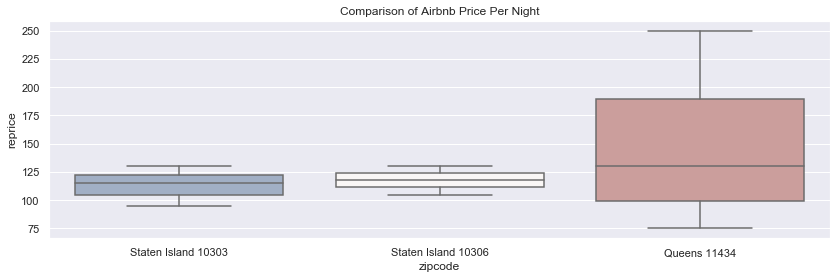

In [86]:
#visualization 2
f, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(x="zipcode", y="reprice",
            palette='vlag',
            data=vdata, whis='range')
ax.set_xticklabels(['Staten Island 10303','Staten Island 10306','Queens 11434'])
ax.set_title('Comparison of Airbnb Price Per Night')

In [87]:
# visualization3: calculate the increasing rate of house price from Dec 2020 to Dec 2030(base: Jan 2020)
house_10306=house.loc[house['zipcode']==10306]
house_10306['value'] = np.log(house_10306['value'])
house_10306=house_10306.drop(['zipcode'], axis=1)
model_10306=ARIMA(house_10306,(1,2,3)).fit()
model_10306.forecast(151)
a=model_10306.forecast(151)[0][30:150]
a=(a-13.07198959)/13.07198959
a

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


array([2.26244472e-10, 8.85779507e-04, 1.78085235e-03, 2.68521877e-03,
       3.59887874e-03, 4.52183229e-03, 5.45407940e-03, 6.39562008e-03,
       7.34645432e-03, 8.30658213e-03, 9.27600350e-03, 1.02547184e-02,
       1.12427269e-02, 1.22400290e-02, 1.32466247e-02, 1.42625139e-02,
       1.52876966e-02, 1.63221730e-02, 1.73659429e-02, 1.84190063e-02,
       1.94813634e-02, 2.05530140e-02, 2.16339581e-02, 2.27241959e-02,
       2.38237272e-02, 2.49325520e-02, 2.60506705e-02, 2.71780825e-02,
       2.83147880e-02, 2.94607872e-02, 3.06160799e-02, 3.17806661e-02,
       3.29545459e-02, 3.41377193e-02, 3.53301863e-02, 3.65319468e-02,
       3.77430009e-02, 3.89633486e-02, 4.01929898e-02, 4.14319246e-02,
       4.26801529e-02, 4.39376748e-02, 4.52044903e-02, 4.64805994e-02,
       4.77660020e-02, 4.90606982e-02, 5.03646879e-02, 5.16779713e-02,
       5.30005481e-02, 5.43324186e-02, 5.56735826e-02, 5.70240402e-02,
       5.83837913e-02, 5.97528360e-02, 6.11311743e-02, 6.25188062e-02,
      

In [88]:
#we use the price for Dec of each year as the predicted price for this year
housechange_10306=[]
for i in range(len(a)):
    if (i+1)%12==0:
        housechange_10306.append(a[i])
        
housechange_10306

[0.010254718442777009,
 0.022724195877037973,
 0.03653194681439551,
 0.05167797125484962,
 0.0681622691984003,
 0.08598484064504755,
 0.10514568559479191,
 0.12564480404763287,
 0.14748219600357038,
 0.17065786146260445]

In [89]:
house_11434=house.loc[house['zipcode']==11434]
house_11434['value'] = np.log(house_11434['value'])
house_11434=house_11434.drop(['zipcode'], axis=1)
model_11434=ARIMA(house_11434,(1,1,3)).fit()
model_11434.forecast(151)
b=model_11434.forecast(151)[0][30:150]
b=(b-12.85663316)/12.85663316
b

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


array([-2.06300090e-10, -9.13746007e-06, -1.82746531e-05, -2.74117853e-05,
       -3.65488567e-05, -4.56858673e-05, -5.48228172e-05, -6.39597062e-05,
       -7.30965345e-05, -8.22333021e-05, -9.13700088e-05, -1.00506655e-04,
       -1.09643240e-04, -1.18779764e-04, -1.27916228e-04, -1.37052631e-04,
       -1.46188973e-04, -1.55325254e-04, -1.64461475e-04, -1.73597635e-04,
       -1.82733734e-04, -1.91869772e-04, -2.01005750e-04, -2.10141666e-04,
       -2.19277522e-04, -2.28413318e-04, -2.37549052e-04, -2.46684726e-04,
       -2.55820339e-04, -2.64955891e-04, -2.74091383e-04, -2.83226813e-04,
       -2.92362183e-04, -3.01497493e-04, -3.10632741e-04, -3.19767929e-04,
       -3.28903056e-04, -3.38038122e-04, -3.47173128e-04, -3.56308073e-04,
       -3.65442957e-04, -3.74577780e-04, -3.83712543e-04, -3.92847244e-04,
       -4.01981886e-04, -4.11116466e-04, -4.20250986e-04, -4.29385445e-04,
       -4.38519843e-04, -4.47654180e-04, -4.56788457e-04, -4.65922673e-04,
       -4.75056828e-04, -

In [90]:
housechange_11434=[]
for i in range(len(b)):
    if (i+1)%12==0:
        housechange_11434.append(b[i])
        
housechange_11434

[-0.00010050665477463794,
 -0.00021014166644592997,
 -0.000319767928954938,
 -0.0004293854445016882,
 -0.0005389942152859305,
 -0.0006485942435058948,
 -0.0007581855313607785,
 -0.0008677680810478444,
 -0.0009773418947646318,
 -0.0010869069747075745]

In [91]:
house_10303=house.loc[house['zipcode']==10303]
house_10303['value'] = np.log(house_10303['value'])
house_10303=house_10303.drop(['zipcode'], axis=1)
model_10303=ARIMA(house_10303,(1,1,3)).fit()
model_10303.forecast(151)
c=model_10303.forecast(151)[0][30:150]
c=(c-13.01342895)/13.01342895
c

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value en

array([3.77668207e-10, 6.81206988e-04, 1.35735403e-03, 2.02849643e-03,
       2.69468853e-03, 3.35598406e-03, 4.01243619e-03, 4.66409750e-03,
       5.31102001e-03, 5.95325515e-03, 6.59085381e-03, 7.22386634e-03,
       7.85234253e-03, 8.47633161e-03, 9.09588231e-03, 9.71104282e-03,
       1.03218608e-02, 1.09283834e-02, 1.15306572e-02, 1.21287284e-02,
       1.27226425e-02, 1.33124448e-02, 1.38981799e-02, 1.44798919e-02,
       1.50576245e-02, 1.56314209e-02, 1.62013238e-02, 1.67673756e-02,
       1.73296179e-02, 1.78880922e-02, 1.84428394e-02, 1.89939000e-02,
       1.95413139e-02, 2.00851207e-02, 2.06253597e-02, 2.11620696e-02,
       2.16952886e-02, 2.22250546e-02, 2.27514053e-02, 2.32743775e-02,
       2.37940081e-02, 2.43103332e-02, 2.48233889e-02, 2.53332104e-02,
       2.58398331e-02, 2.63432916e-02, 2.68436202e-02, 2.73408530e-02,
       2.78350236e-02, 2.83261651e-02, 2.88143105e-02, 2.92994923e-02,
       2.97817427e-02, 3.02610935e-02, 3.07375762e-02, 3.12112220e-02,
      

In [92]:
housechange_10303=[]
for i in range(len(c)):
    if (i+1)%12==0:
        housechange_10303.append(c[i])
        
housechange_10303

[0.007223866344732687,
 0.014479891908526058,
 0.021162069571204794,
 0.027340853034339963,
 0.03307804610454651,
 0.03842786467718561,
 0.043437868335894095,
 0.04814977757575197,
 0.052600190692553325,
 0.056821212656587246]

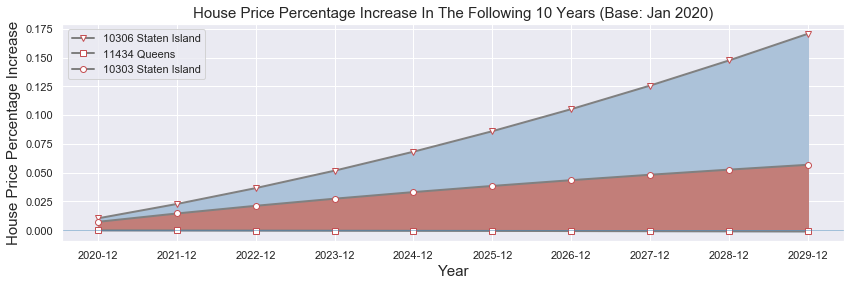

In [93]:
plt.figure(figsize=(14, 4),)
x =['2020-12', 
    '2021-12',
    '2022-12',
    '2023-12',
    '2024-12',
    '2025-12',
    '2026-12',
    '2027-12',
    '2028-12',
    '2029-12',
   ]

plt.plot(x, housechange_10306, color='grey', marker='v',mec='r', mfc='w',label='10306 Staten Island', linewidth=2)
plt.plot(x, housechange_11434, color='grey',marker='s',mec='r', mfc='w',label='11434 Queens', linewidth=2)
plt.plot(x, housechange_10303, color='grey',marker='o',mec='r', mfc='w',label='10303 Staten Island', linewidth=2)
plt.fill_between(x,housechange_10303,housechange_10306, color='#acc2d9')
plt.fill_between(x,housechange_10303,0, color='#c27e79')
plt.fill_between(x,0,housechange_11434, color='#acc2d9')


plt.xlabel('Year', fontsize=15) 
plt.ylabel("House Price Percentage Increase", fontsize=15) 
plt.title("House Price Percentage Increase In The Following 10 Years (Base: Jan 2020)", fontsize=15)
plt.axhline(y=0, linewidth=0.5, color='steelblue')

plt.legend()
